# Hassan - This is my trial project

Load the igraph library

In [18]:
# interactive plots in Jupyter, used to show plots inline in the notebook
%matplotlib inline

# The igraph library
from igraph import *

# Numpy for enhanced math array management
import numpy as np

# statistical tools (we only use ECDF)
from statsmodels.distributions.empirical_distribution import ECDF

# Mathematical plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# use to control whether to show the entire cell output or only the last_expr (default)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to generate random numbers
from random import *

# to fit power law distributions
from powerlaw import *

# Summary of the dataset

<br/>the graph is directed
<br/>if vertices have a name
<br/>if edges are not weighted 
<br/>if the graph is not bipartite

<br/>the number of nodes: 63731
<br/>the number of edges: 1269502

In [24]:
fb_g = read("dataset/socfb-wosn-friends.cut.edges", format = "ncol", directed = True)
summary(fb_g, verbosity=1, max_rows = 25, edge_list_format = 'edgelist')

IGRAPH DN-- 63731 1269502 -- 
+ attr: name (v)
+ edges (vertex names):
       edge 
[0]    1->2 
[1]    1->2 
[2]    1->3 
[3]    1->4 
[4]    1->4 
[5]    1->5 
[6]    1->6 
[7]    1->7 
[8]    1->8 
[9]    1->9 
[10]   1->9 
[11]   1->10
[12]   1->11
[13]   1->12
[14]   1->13
[15]   1->13
[16]   1->14
[17]   1->15
[18]   1->16
[19]   1->16
[20]   1->17
[21]   1->17
[22]   1->18
[23]   1->18
[24]   1->19


In [63]:
# weakly connected components means that it is sufficient that nodes are connected via a unidirected path
# strongly connected components means that nodes must be mutually connected via two unidirected paths
fg_clust = fb_g.clusters(mode='WEAK')

print("Giant Component characteristics:")
print("Is connected?: "+str(fb_g.is_connected(mode = "WEAK")))

print("Number of clusters: "+str(len(fg_clust)))

print("The sizes of the clusters:"+str(fg_clust.sizes()))

fb_GC = fg_clust.giant()

summary(fb_GC, verbosity = 1, edge_list_format = "edgelist", max_rows = 20)


Giant Component characteristics:
Is connected?: False
Number of clusters: 144
Number of vertices[63392, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 5, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 11, 4, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 5, 2, 2, 2, 3, 2, 2, 4, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 5, 2, 2, 2, 2, 2, 3, 2, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
IGRAPH UN-- 63392 1269230 -- 
+ attr: name (v)
+ edges (vertex names):
       edge 
[0]    1--2 
[1]    1--2 
[2]    1--3 
[3]    1--4 
[4]    1--4 
[5]    1--5 
[6]    1--6 
[7]    1--7 
[8]    1--8 
[9]    1--9 
[10]   1--9 
[11]   1--10
[12]   1--11
[13]   1--12
[14]   1--13
[15]   1--13
[16]   1--14
[17]   1--15
[18]   1--16
[19]   1--16


In [64]:
# degree() method
# - mode = "ALL" to consider the undirected graph
fb_deg = fb_GC.degree(mode = "all")
fb_deg[0:19]

# the maximum degree, and the ID of the node with maximum degree
max(fb_deg)
id_max = np.argmax(fb_deg)
id_max

# the set of neighbours of the node with max degree
# - NB: in case of bidirectional links, the same neighbour is counted twice if mode = 'all'
nei = fb_GC.neighbors(id_max, mode="all")
len(nei)

# the set of nodes reachable from id_max with AT MOST 1 jump
neighbours = fb_GC.neighborhood(id_max, order = 1, mode="all")
neighbours[0:19]

# the number of such nodes
# - NB: it also includes the node id_max itself (which is reachable with 0 jumps)
# - thus, the number of nodes reachable with one jump is this - 1
len(neighbours)
fb_GC.neighborhood_size(id_max, order = 1, mode="all")

[39, 43, 34, 15, 43, 40, 50, 18, 378, 5, 46, 27, 67, 441, 199, 54, 46, 53, 53]

1826

839

1826

[839,
 17,
 22,
 68,
 75,
 130,
 134,
 140,
 144,
 145,
 159,
 175,
 192,
 193,
 199,
 211,
 213,
 214,
 215]

1099

1099

In [65]:
# take the undirected version of the Giant Component 
# combine_edges tells what to do with the weights (default, lost attribute; here: sum values)
fb_GC_u = fb_GC.as_undirected(combine_edges = "sum")

# Note the lower number of edges with respect to the directed version.
# This is because igraph automatically simplifies the graph (i.e., merges edges between the same nodes)
# to do so manually on a multi-edge graph: g.simplify()
# to check if the graph is simple or not: g.is_simple()
summary(fb_GC_u, verbosity = 1, edge_list_format = "edgelist", max_rows = 25)

# the maximum degree, and the ID of the node with maximum degree
fb_deg_u = fb_GC_u.degree()
max(fb_deg_u)
id_max_u = np.argmax(fb_deg_u)
id_max_u

# the set of neighbours of the node with max degree
nei_u = fb_GC_u.neighbors(id_max_u)
len(nei_u)

# the set of nodes reachable from id_max with AT MOST 1 jump
neighbours = fb_GC_u.neighborhood(id_max, order = 1, mode="all")
neighbours[0:19]

# the number of such nodes
# - NB: it also includes the node id_max itself (which is reachable with 0 jumps)
# - thus, the number of nodes reachable with one jump is this - 1
len(neighbours)
fb_GC_u.neighborhood_size(id_max, order = 1, mode="all")

IGRAPH UN-- 63392 1269230 -- 
+ attr: name (v)
+ edges (vertex names):
       edge 
[0]    1--2 
[1]    1--2 
[2]    1--3 
[3]    1--4 
[4]    1--4 
[5]    1--5 
[6]    1--6 
[7]    1--7 
[8]    1--8 
[9]    1--9 
[10]   1--9 
[11]   1--10
[12]   1--11
[13]   1--12
[14]   1--13
[15]   1--13
[16]   1--14
[17]   1--15
[18]   1--16
[19]   1--16
[20]   1--17
[21]   1--17
[22]   1--18
[23]   1--18
[24]   1--19


1826

839

1826

[839,
 17,
 22,
 68,
 75,
 130,
 134,
 140,
 144,
 145,
 159,
 175,
 192,
 193,
 199,
 211,
 213,
 214,
 215]

1099

1099

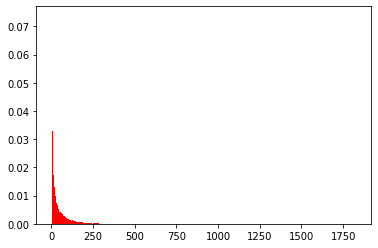

In [66]:
dd_h, dd_h_bins, _ = plt.hist(fb_deg, bins=range(1,max(fb_deg)+2), density=True, color = 'red')

[0, 500, 0, 0.04]

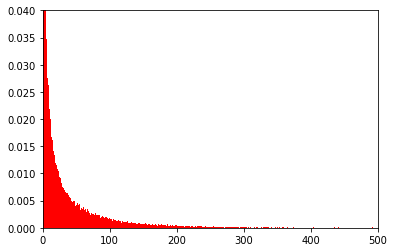

In [68]:
dd_h, dd_h_bins, _ = plt.hist(fb_deg, bins=range(1,max(fb_deg)+2), density = True, color = 'red')
plt.axis([0,500,0,0.04])

Text(0.5, 0, 'd')

Text(0, 0.5, 'P(Degree = d)')

Text(0.5, 1.0, 'Degree density on a log-log scale')

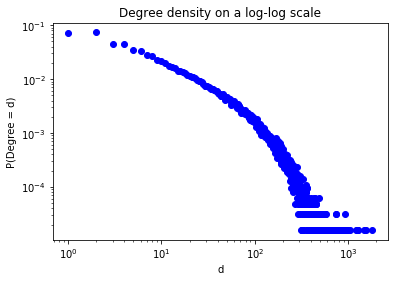

In [69]:
# Degree density on a loglog scale
plt.loglog(dd_h_bins[:-1], dd_h, 'bo')
plt.xlabel("d")
plt.ylabel("P(Degree = d)")
plt.title("Degree density on a log-log scale")

[0, 100, 0, 1]

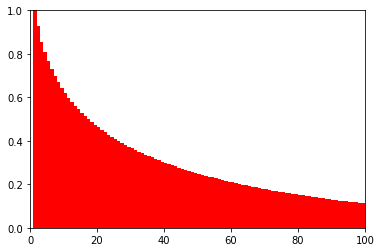

In [70]:
# Compute the CCDF - we can use 2 ways
# 1. use the histogram functions with parameter cumulative=-1 gives the CCDF
dd_h, dd_h_bins, _ = plt.hist(fb_deg, bins=range(1,max(fb_deg)+2), density = True, color = 'red', cumulative = -1)
plt.axis([0,100,0,1])

Text(0.5, 0, '$d$')

Text(0, 0.5, '$P(D>d)$')

Text(0.5, 1.0, 'Degree CCDF in a lin-lin scale')

Text(0.5, 0, '$d$')

Text(0, 0.5, '$P(D>d)$')

Text(0.5, 1.0, 'Degree CCDF in a log-log scale')

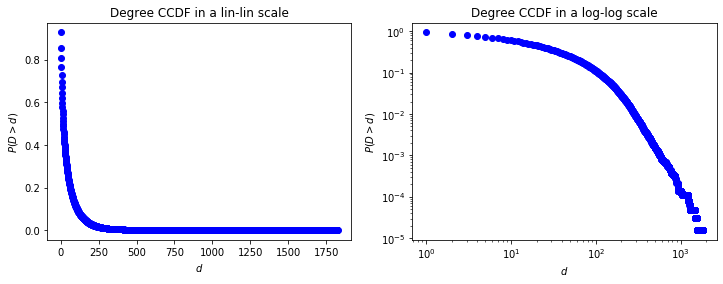

In [71]:
# 2. More general: use the ECDF function of statsmodels.distributions.empirical_distribution
# ECDF(dataset) returns a the empirical CDF computed from the dataset, which can be used as a FUNCTION
# - i.e., it is possible to call ECDF(x) for any x, irrespective of the set of data from which the ECDF is derived
deg_cdf = ECDF(fb_deg)

# scale the fig size twice in length
default_sizes = plt.rcParams["figure.figsize"]
fig_sizes = (2*default_sizes[0], default_sizes[1])

# generate a figure with 2 subplots, organised in 1 row and 2 columns
# ax1 and ax2 ("axes") are used to access the individual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = fig_sizes)

# plot the CCDF in lin-lin and log-log scales
# see http://matplotlib.org/api/axes_api.html for the API of the Axis class
# see http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot or the Axes.plot() documentation
# for the parameters of the plot method
degs = np.arange(1,max(fb_deg)+1)

ax1.plot(degs, 1-deg_cdf(degs), 'bo')
ax1.set_xlabel("$d$")
ax1.set_ylabel("$P(D>d)$")
ax1.set_title("Degree CCDF in a lin-lin scale")

ax2.loglog(degs, 1-deg_cdf(degs), 'bo')
ax2.set_xlabel("$d$")
ax2.set_ylabel("$P(D>d)$")
ax2.set_title("Degree CCDF in a log-log scale")

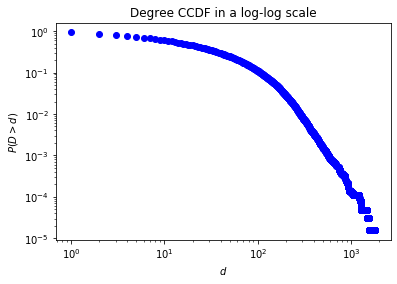

In [72]:
_ = plt.loglog(degs, 1-deg_cdf(degs), 'bo')
_ = plt.xlabel("$d$")
_ = plt.ylabel("$P(D>d)$")
_ = plt.title("Degree CCDF in a log-log scale")

In [73]:
# The global assortativity coefficient - we will need the undirected version of the graph from now on
fb_GC_u.assortativity_degree()

# The knn data. Two lists are returned
# - the list of average degrees for each node (knn)
# - the list of average degrees for each degree (knnk)
fb_knn, fb_knnk = fb_GC_u.knn()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = fig_sizes)
ax1.loglog(fb_GC_u.degree(), fb_knn, 'go')
ax1.set_xlabel("degree")
ax1.set_ylabel("Neighbors degree")
ax1.set_title("$knn$ index for the FB Giant Component")

ax2.loglog(range(1,max(fb_GC_u.degree())+1), fb_knnk, 'go')
ax2.set_xlabel("degree")
ax2.set_ylabel("Average degree of neighbors")
ax2.set_title("$knnk$ index for the FB Giant Component")

0.16357190892200563

InternalError: Error at /project/vendor/source/igraph/src/structural_properties.c:6084: Average nearest neighbor degree works only with simple graphs, Invalid value

In [74]:
# global transitivity (C1)
# as_undirected(), otherwise results would be wrong
fb_GC_u.transitivity_undirected()

# average local transitivity (C2)
# mode = 0 means that nodes with less than two neighbours will have zero transitivity
fb_GC_u.transitivity_avglocal_undirected(mode="zero")

# local transitivity for all vertices
local_trans = fb_GC_u.transitivity_local_undirected(mode="zero")
local_trans[0:19]
mean(local_trans)

0.14772062102048877

0.22180739982867637

InternalError: Error at /project/vendor/source/igraph/src/triangles.c:492: Transitivity works on simple graphs only, Invalid value